<a href="https://colab.research.google.com/github/GarimaChopra/AML/blob/main/Project6_Fetal_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were classified by three expert obstetricians into 3 classes:

1.   Normal
2.   Suspect
3. Pathological

In [94]:
# Using Pandas for importing data from file 
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using numpy for to operate on multidimentional arrays.
import numpy as np

In [95]:
# Read raw file from github into a dataframe

df= pd.read_csv('https://raw.githubusercontent.com/GarimaChopra/AML/main/fetal_health.csv')

#verify if data is loaded
df.shape

(2126, 22)

In [96]:
# view dataset
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [97]:
#summarize the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Dataset contains 22 columns and 2126 rows. All columns are float type with no nulls

**Problem Statement:** 

1) Perform a preliminary analysis on the dataset to determine which attributes have the highest correlation with the target variable. Use graphs to visualize the results.

2) Plot a histogram for the class distributions.

3) Clean the dataset by handling missing data values, scaling, encoding, etc., as necessary.

In [98]:
# Check to see if there are any missing values
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

As none of the columns contain null values we dont need an imputer

In [99]:
#Checking datatypes
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

No encoder is needed as all columns are float type

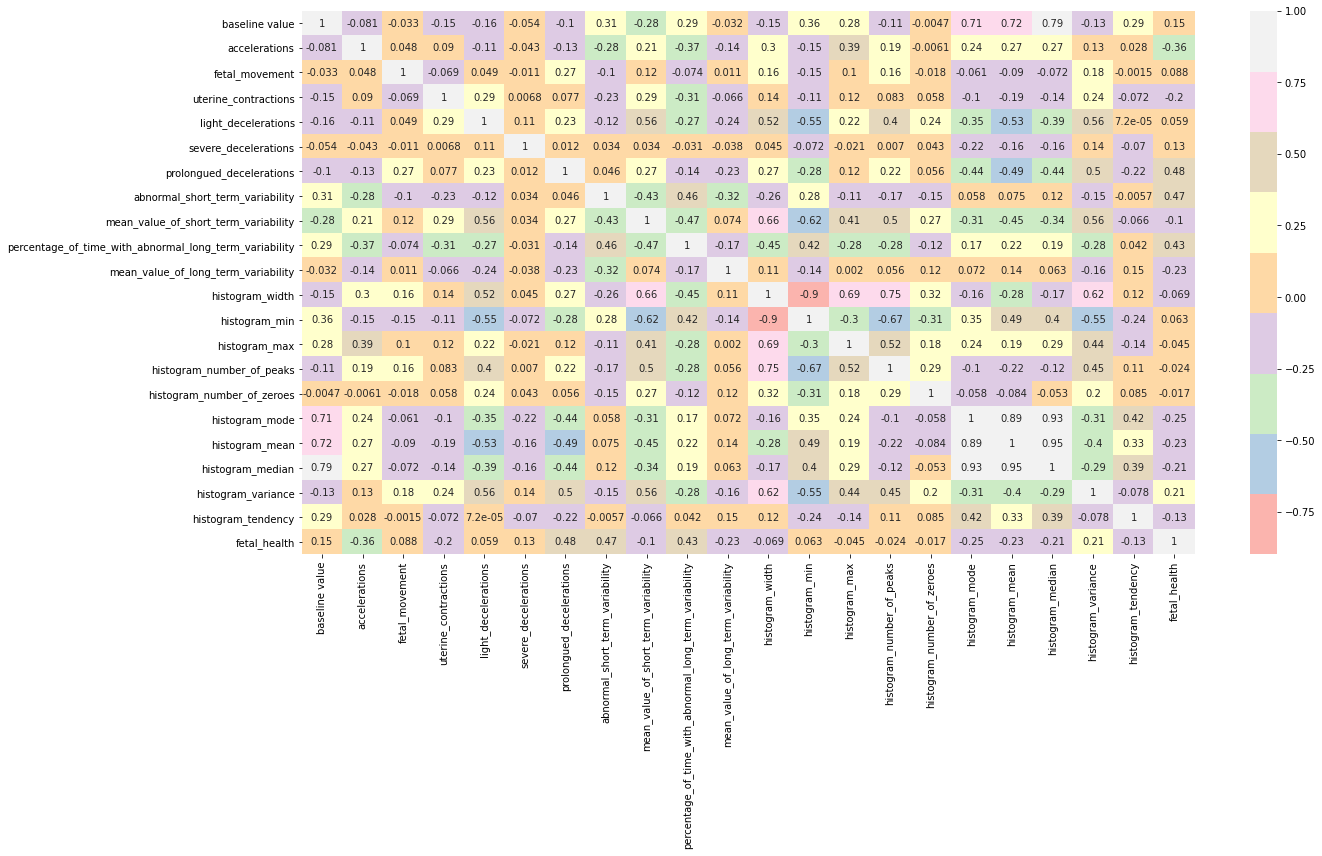

In [100]:
#Correlation
corr = df.corr(method="pearson")
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='Pastel1')

In [101]:
corr_matrix=df.corr()
corr_matrix["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10


The feature with the strongest correlation to the target class (fetal health) is prolonged decelerations (0.48), prolonged deceleration is defined as a deceleration in fetal heart rate that lasts more than 3 minutes. The next highest positive feature correlations to the target class is abnormal short term variability (0.47), and percentage of time with abnormal long term varability (0.42).

The highest inversely correlated feature was accelerations (-0.36). Accelerations are "short-term rises in the heart rate of at least 15 beats per minute, lasting at least 15 seconds." The inverse relationship suggests that fewer the accelerations, higher the target class (more likely to be 3 i.e pathological).


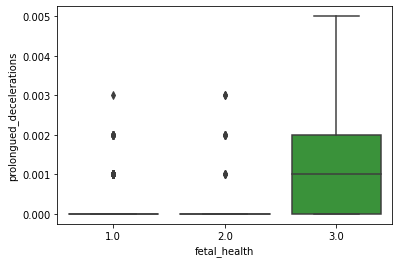

In [102]:
ax1 = sns.boxplot(x='fetal_health', y='prolongued_decelerations' , data=df)  #strongly correlated to target class

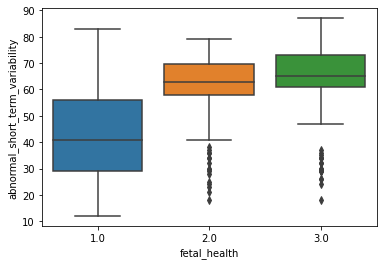

In [103]:
ax2= sns.boxplot(x='fetal_health',y='abnormal_short_term_variability' , data=df) #correlated to target class

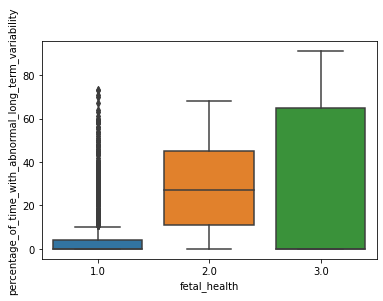

In [104]:
ax3 = sns.boxplot(x='fetal_health',y='percentage_of_time_with_abnormal_long_term_variability',data=df) #correlated to target class

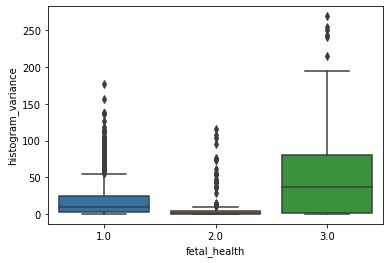

In [105]:
ax4 = sns.boxplot(x='fetal_health',y='histogram_variance',data=df) 

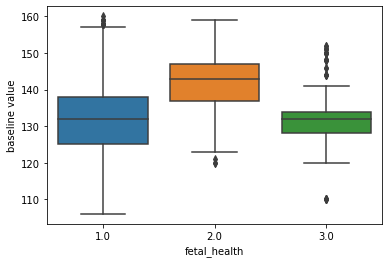

In [106]:
ax5 = sns.boxplot(x='fetal_health',y='baseline value', data=df) 

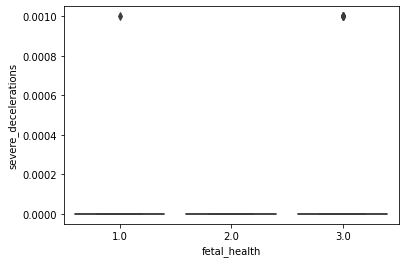

In [107]:
ax6 = sns.boxplot(x='fetal_health',y='severe_decelerations',data=df)  # low correlation to target class

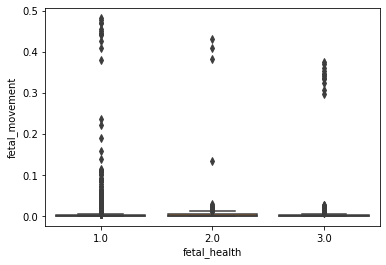

In [108]:
ax7= sns.boxplot(x='fetal_health',y='fetal_movement', data=df) # low correlation to target class

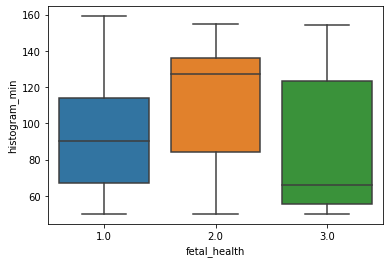

In [109]:
ax8 = sns.boxplot(x='fetal_health',y='histogram_min', data=df) 

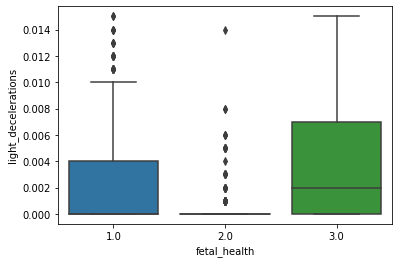

In [110]:
ax9 = sns.boxplot(x='fetal_health',y='light_decelerations', data=df) 

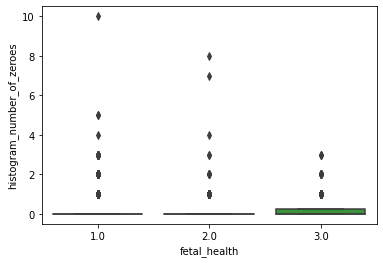

In [111]:
ax10 = sns.boxplot(x='fetal_health',y='histogram_number_of_zeroes', data=df) 

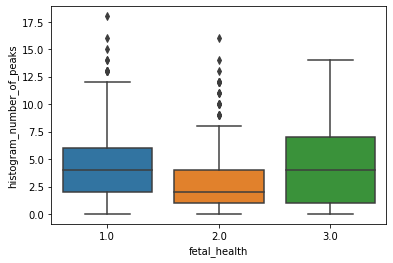

In [112]:
ax11 = sns.boxplot(x='fetal_health',y='histogram_number_of_peaks', data=df) 

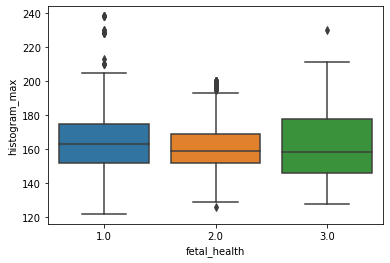

In [113]:
ax12 = sns.boxplot(x='fetal_health',y='histogram_max',data=df) 

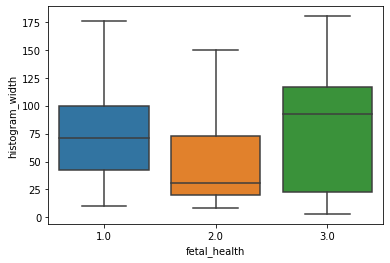

In [114]:
ax13 = sns.boxplot(x='fetal_health',y='histogram_width', data=df) 

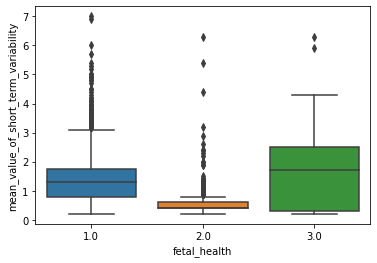

In [115]:
ax14 = sns.boxplot(x='fetal_health',y='mean_value_of_short_term_variability', data=df) 

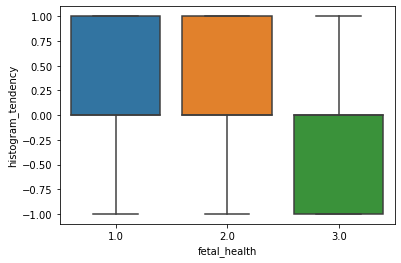

In [116]:
ax15 = sns.boxplot(x='fetal_health',y='histogram_tendency',data=df) 

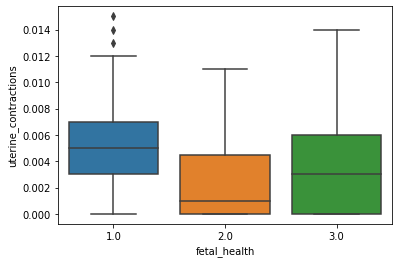

In [117]:
ax16 = sns.boxplot(x='fetal_health',y='uterine_contractions',data=df) 

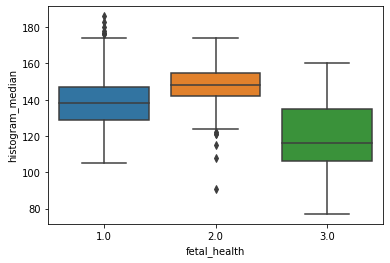

In [118]:
ax17 = sns.boxplot(x='fetal_health',y='histogram_median',data=df) 

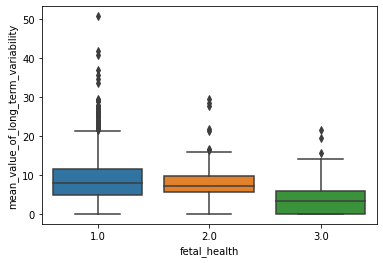

In [119]:
ax18= sns.boxplot(x='fetal_health',y='mean_value_of_long_term_variability',data=df) 

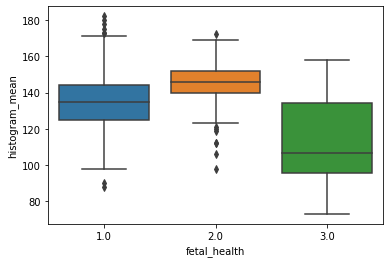

In [120]:
ax19 = sns.boxplot(x='fetal_health',y='histogram_mean', data=df) 

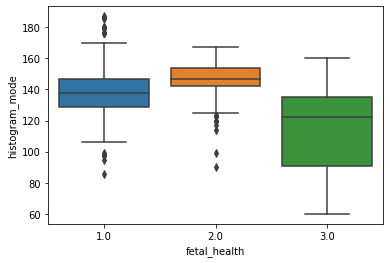

In [121]:
ax20 = sns.boxplot(x='fetal_health',y='histogram_mode', data=df) 

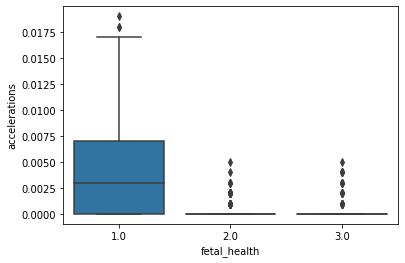

In [122]:
ax21 = sns.boxplot(x='fetal_health',y='accelerations' , data=df) # negative correlation to target class

The above boxplots show the correlation obtained for various features with respect to target class. Prolonged_decleration, abnormal_short_term_viability appear to be strongly correlated

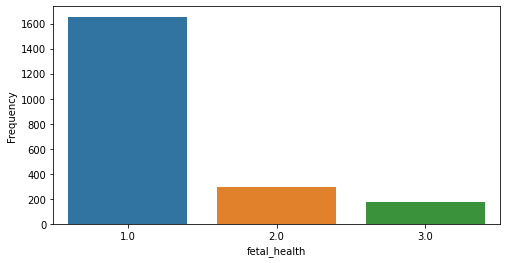

In [123]:
#Checking if dataset is well represented

plt.subplots(figsize=(8,4))
sns.barplot(x = df['fetal_health'].value_counts().sort_index(ascending=True).index , y = df['fetal_health'].value_counts().sort_index(ascending=True).values);
plt.xlabel('fetal_health');
plt.ylabel('Frequency');

The above graph shows that the dataset is biased and does not have enough represenation for target (2 i.e Suspect and 3 i.e. Pathological)

In [124]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17304bb550>,
      dtype=object)

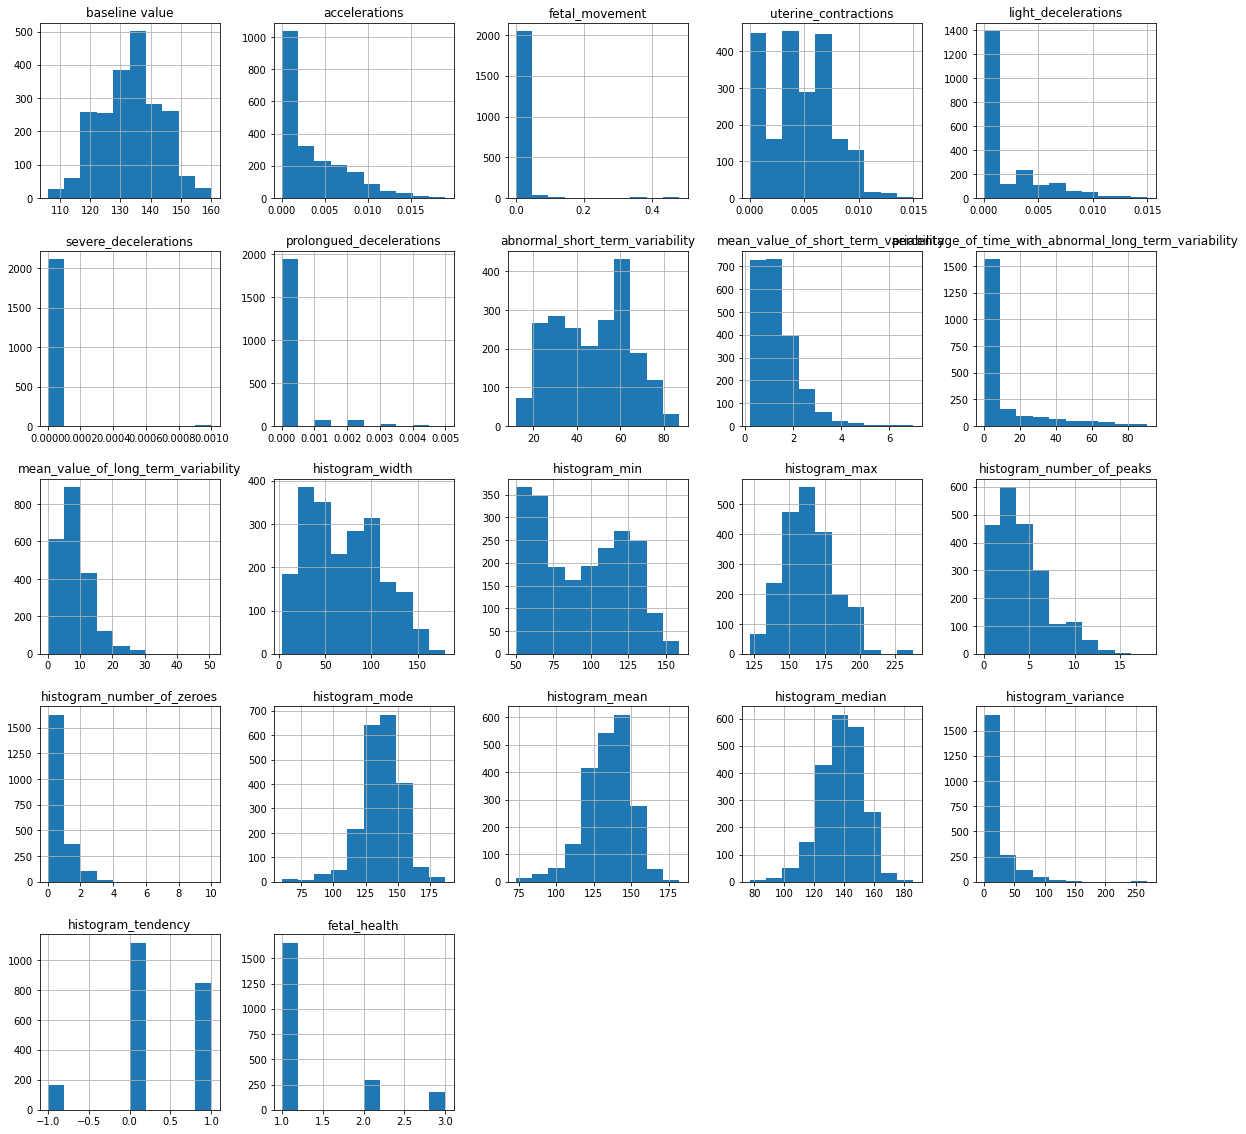

In [125]:
#plotting histogram
df.hist(figsize=(20, 20))

The dataset has some skewed features such as histogram number of zeros, acceleration,light_declerations



In [126]:
# divinding dataset into target(Y) and features(X)

X= df.drop(['fetal_health'], axis=1) #features
Y = df['fetal_health'] #target

In [127]:
#Scaling Data
#import scaler 
from sklearn.preprocessing import StandardScaler

# scale X
scaler = StandardScaler()
scaler.fit(X)
scaledX= pd.DataFrame(scaler.transform(X), columns=X.columns )

scaledX.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


**Problem Statement:** 

4) Create a sequential neural model.

5) Evaluate the model and display the classification scores and the confusion matrix.

6) Plot the model's accuracy/loss values as well as the validated accuracy/loss values during training.

In [128]:
#retagging target column from 1,2,3, to 0,1,2 to create a sequential model

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [129]:
# splitting the scaled data into training and testing sets 80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaledX, Y_encoded, test_size=0.2, random_state=22)

In [130]:
#creating sequential model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten

model = keras.models.Sequential([
                                 # flatten the dataframe from matrix with 21 features to 1D array of size 21
                                 keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                 # 1 hidden layer, uses relu for activation function
                                 keras.layers.Dense(50, activation="relu"),
                                 # 3 output nodes, 1 for each class [0,1,2]
                                 # softmax for multiclass
                                 keras.layers.Dense(3, activation="softmax")])


In [131]:
#model architecture
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 21)                0         
_________________________________________________________________
dense_114 (Dense)            (None, 50)                1100      
_________________________________________________________________
dense_115 (Dense)            (None, 3)                 153       
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compiling model
model.compile(loss="sparse_categorical_crossentropy", # for multiclass
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),verbose=0)

# evaulate the model 
test = model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9061


In [133]:
# prediction and a classification report from the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_pred = np.argmax(model.predict(X_test), axis=-1)

#print confusion matrix
print(confusion_matrix(y_test, Y_pred))


[[327   9   1]
 [ 18  37   1]
 [  2   9  22]]


In [134]:
# print various classification performance measures
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       337
           1       0.67      0.66      0.67        56
           2       0.92      0.67      0.77        33

    accuracy                           0.91       426
   macro avg       0.84      0.77      0.80       426
weighted avg       0.90      0.91      0.90       426



The precision for target class 0 (normal) is high and so is the recall . The precision is suprisingly high for pathalogical considering the small dataset for it. Precision for suspect is low which is acceptable considering the less representation in dataset most suspect cases were classified as normal

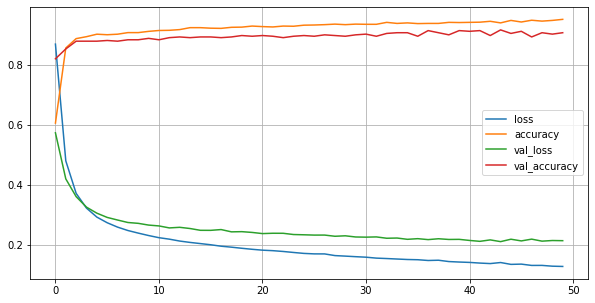

In [135]:
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot
from numpy import where

# plot model accuracy and loss during training
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.show()

the gaps between accuracy/val_accuracy  and loss/val_loss show overfitting in model. Overfitting is not severe in the above model

**Problem Statement:** 

7) Cross-validate the NN model, and calculate the mean accuracy of the folds.



In [136]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# create the sequential NN model
def create_baseline():
    # train a network with one hidden layer (50 nodes) and three output nodes
    model = keras.models.Sequential([
                                    # flatten the dataframe from matrix with 21 features to 1D array of size 21
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    # 1 hidden network, uses relu for activation function
                                    keras.layers.Dense(50, activation="relu"),
                                    # 3 output nodes, 1 for each class
                                    # softmax for multiclass
                                    keras.layers.Dense(3, activation="softmax")
    ])
    # Compile the model using appropriate parameters
    model.compile(loss="sparse_categorical_crossentropy", # for multiclass
              optimizer="adam",
              metrics=["accuracy"])
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=150, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX, Y_encoded, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

Baseline accuracy: 91.39% (+/- 0.92%)


Cross Validated Model's mean accuracy of 91.11% (around this) which is high  considering the uneven distribution of the target classes. 



**Problem Statement:**

8)Experiment with # hidden layers, # nodes / hidden layer, batch size, etc. to see which combinations produce a better accuracy. You may use grid search, if you wish.

In [137]:
# cross validation with multiple hidden layers 

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# create the sequential NN model
def create_baseline():
    # train a network with 4 hidden layer (50 nodes) and three output node
    model = keras.models.Sequential([
                                    # flatten the dataframe from matrix with 21 features to 1D array of size 21
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    # 1 hidden layer, uses relu for activation function
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(50, activation="relu"),
                                    # 3 output nodes, 1 for each class
                                    # softmax for multiclass
                                    keras.layers.Dense(3, activation="softmax")
    ])
    # Compile the model using appropriate parameters
    model.compile(loss="sparse_categorical_crossentropy", # for multiclass
              optimizer="adam",
              metrics=["accuracy"])
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=150, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX,Y_encoded, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

Baseline accuracy: 91.53% (+/- 0.80%)


In [138]:
# cross validation with more number of nodes

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# create the sequential NN model
def create_baseline():
    # train a network with 1 hidden layer (200 nodes) and one output node
    model = keras.models.Sequential([
                                    # flatten the dataframe from matrix with 21 features to 1D array of size 21
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    # 1 hidden layer, uses relu for activation function
                                    keras.layers.Dense(200, activation="relu"),
                                    # 3 output nodes, 1 for each class
                                    # softmax for multiclass
                                    keras.layers.Dense(3, activation="softmax")
    ])
    # Compile the model using appropriate parameters
    model.compile(loss="sparse_categorical_crossentropy", # for multiclass
              optimizer="adam",
              metrics=["accuracy"])
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=150, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX,Y_encoded, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

Baseline accuracy: 92.85% (+/- 0.36%)


In [139]:
 #cross validation with multiple layers and different number of nodes

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# create the sequential NN model
def multi_node_multi_layer():
    # train a network with 4 hidden layer (50 nodes) and three output node
    model = keras.models.Sequential([
                                    # flatten the dataframe from matrix with 21 features to 1D array of size 21
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    # 1 hidden layer, uses relu for activation function
                                    keras.layers.Dense(100, activation="relu"),
                                    keras.layers.Dense(70, activation="relu"),
                                    keras.layers.Dense(65, activation="relu"),
                                    keras.layers.Dense(20, activation="relu"),
                                    # 3 output nodes, 1 for each class
                                    # softmax for multiclass
                                    keras.layers.Dense(3, activation="softmax")
    ])
    # Compile the model using appropriate parameters
    model.compile(loss="sparse_categorical_crossentropy", # for multiclass
              optimizer="adam",
              metrics=["accuracy"])
    return model


# evaluate model with standardized dataset
nodes_layers_estimator = KerasClassifier(build_fn=multi_node_multi_layer, epochs=150, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX, Y_encoded, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

Baseline accuracy: 92.71% (+/- 0.73%)


In [140]:
 #cross validation with different batch size

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# create the sequential NN model
def create_baseline():
    # train a network with one hidden layer (50 nodes) and three output nodes
    model = keras.models.Sequential([
                                    # flatten the dataframe from matrix with 21 features to 1D array of size 21
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    # 1 hidden network, uses relu for activation function
                                    keras.layers.Dense(50, activation="relu"),
                                    # 3 output nodes, 1 for each class
                                    # softmax for multiclass
                                    keras.layers.Dense(3, activation="softmax")
    ])
    # Compile the model using appropriate parameters
    model.compile(loss="sparse_categorical_crossentropy", # for multiclass
              optimizer="adam",
              metrics=["accuracy"])
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=150, batch_size=128, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX, Y_encoded, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

Baseline accuracy: 90.64% (+/- 1.04%)


In [141]:
#grid search for epochs


from sklearn.model_selection import GridSearchCV

# define the grid search parameters

epochs = [10, 60, 150, 200]
# params dict
param_grid = dict(epochs=epochs)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
#fit the model
grid = GridSearchCV(estimator=nodes_layers_estimator, param_grid=param_grid, n_jobs=1, cv=kfold)
grid_result = grid.fit(scaledX,Y_encoded)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.930854 using {'epochs': 150}


Epoch at 200 gave a accuracy of 93.2% 

**Summary**

**Data Preparation and Distribution**

Dataset had no null values so no imputer was needed. All features were float type so encoding was also not required.
Scaling of features was done and target (fetal_health) was encoded to start categories from 0 instead of 1.

The target classes had a very uneven distribution. Out of 2126 total intances, 1,655 were normal, 295 were suspect, and 176 were pathological.

**Correlation**

The feature with the strongest correlation to the target class (fetal health) is prolonged decelerations (0.48), prolonged deceleration is defined as a deceleration in fetal heart rate that lasts more than 3 minutes. The next highest positive feature correlations to the target class is abnormal short term variability (0.47), and percentage of time with abnormal long term varability (0.42).

The highest inversely correlated feature was accelerations (-0.36). Accelerations are "short-term rises in the heart rate of at least 15 beats per minute, lasting at least 15 seconds." The inverse relationship suggests that fewer the accelerations, higher the target class (more likely to be 3 i.e pathological).


**Sequential Neural Network**

The sequential neural network for multiclass classification had a cross-validated mean accuracy of 91.11% and ranges from 90-92%. Considering the uneven distributions of dataset, this sequential model performed well- especially for the normal and pathological classes. 
Precision for suspect is low which is acceptable considering the less representation in dataset most suspect cases were classified as normal

**Result :**

Although the data was unevenly distributed we were able to achieve a model with not severe overfitting and approx 91% accuracy.
Using grid search on epach the accuracy was 93%


